In [66]:
import IBLGF
from importlib import reload
reload(IBLGF)
from IBLGF import *

In [67]:
nx = 1000
ny = 500
dx = 0.025
dy = 0.025
v = sol(dx, dy, 0.25, 1e-5, nx, ny, int(nx/8), int(ny/2), Re = 40)

/Users/weihou/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/weihou/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:142: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/Users/weihou/anaconda3/lib/python3.11/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [68]:

resmat = np.zeros((2*ny, 2*nx))
np.isnan(v.LGF).any()
for i in range(1,2*ny):
    for j in range(1,2*nx):
        res = 2/dx/dx*v.LGF[i,j] - v.LGF[i,j - 1]/dx/dx - v.LGF[i,j + 1]/dx/dx + 2/dy/dy*v.LGF[i,j] - v.LGF[i - 1,j]/dy/dy - v.LGF[i + 1,j]/dy/dy
        res *= dx * dx
        resmat[i,j] = res
        if abs(res) > 0.1:
            print(res)
            print(i,j)

-1.0000000000000002
500 1000


In [4]:
v.LGF

array([[1.37450403, 1.37437667, 1.37424923, ..., 1.37424923, 1.37437667,
        1.37450403],
       [1.3744404 , 1.37431294, 1.3741854 , ..., 1.3741854 , 1.37431294,
        1.3744404 ],
       [1.37437686, 1.37424929, 1.37412165, ..., 1.37412165, 1.37424929,
        1.37437686],
       ...,
       [1.37437686, 1.37424929, 1.37412165, ..., 1.37412165, 1.37424929,
        1.37437686],
       [1.3744404 , 1.37431294, 1.3741854 , ..., 1.3741854 , 1.37431294,
        1.3744404 ],
       [1.37450403, 1.37437667, 1.37424923, ..., 1.37424923, 1.37437667,
        1.37450403]])

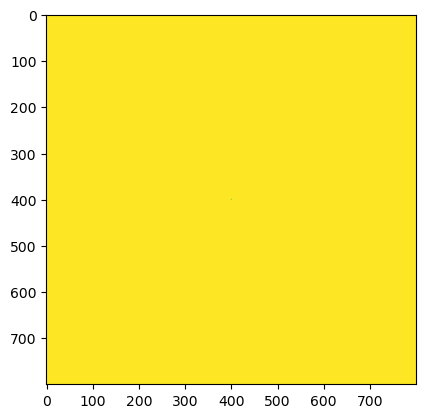

In [15]:
plt.imshow(resmat/dx/dx)

In [9]:
v.coeff_a[2,2]

2.0

In [71]:
#v.use_direct_solve = False
v.time_march(10)

At  1.8625000000000098  Total IB force:  [ 1.03554021 -0.02414663]
step  0
At  1.86875000000001  Total IB force:  [ 1.0349234  -0.02417552]
step  1
At  1.87500000000001  Total IB force:  [ 1.03433585 -0.02420401]
step  2
At  1.88125000000001  Total IB force:  [ 1.03377681 -0.02423214]
step  3
At  1.8875000000000102  Total IB force:  [ 1.03324555 -0.02425996]
step  4
At  1.8937500000000103  Total IB force:  [ 1.03274137 -0.02428749]
step  5
At  1.9000000000000103  Total IB force:  [ 1.03226357 -0.02431476]
step  6
At  1.9062500000000104  Total IB force:  [ 1.03181148 -0.0243418 ]
step  7
At  1.9125000000000105  Total IB force:  [ 1.03138444 -0.02436865]
step  8
At  1.9187500000000106  Total IB force:  [ 1.03098181 -0.02439532]
step  9


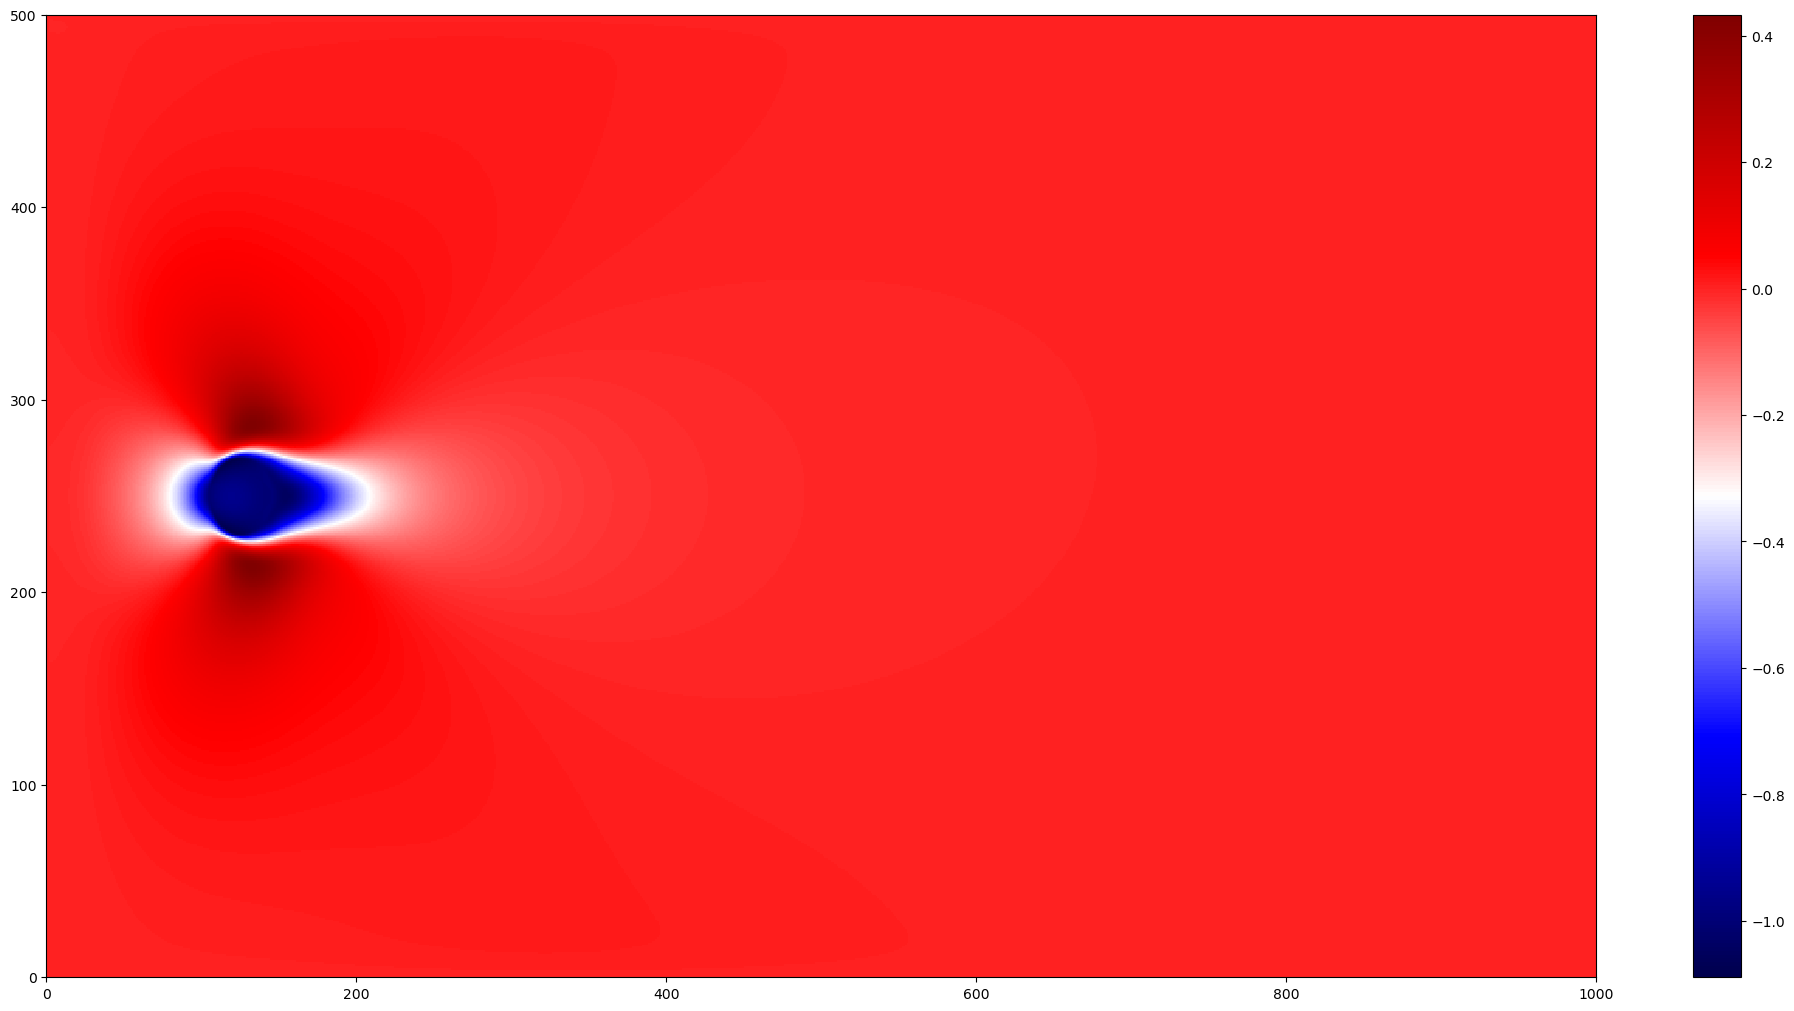

In [72]:
fig, axes = plt.subplots(figsize = (dx*nx, dy*ny))
axes.grid(False)
im = axes.pcolormesh(v.u[0], cmap = 'seismic',)

cbar = plt.colorbar(im)

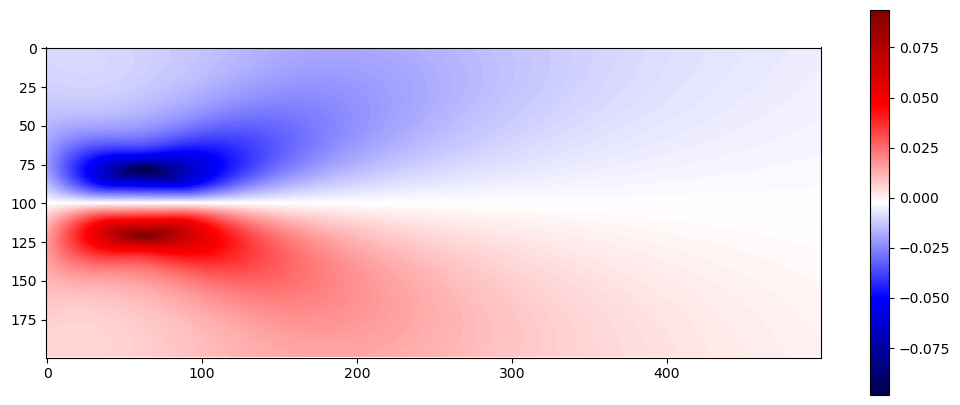

In [61]:
fig, axes = plt.subplots(figsize = (dx*nx, dy*ny))
axes.grid(False)
im = axes.imshow(v.stream[0], cmap = 'seismic')

cbar = plt.colorbar(im)

In [60]:
v.velocity_refresh(v.u, v.omega)

In [45]:
from scipy import signal
sig = np.repeat([0., 1., 0.], 3)
win = [1,-1,0]
filtered = signal.convolve(sig, win, mode='same')

In [46]:
filtered

array([ 0.,  0.,  1.,  0.,  0., -1.,  0.,  0.,  0.])

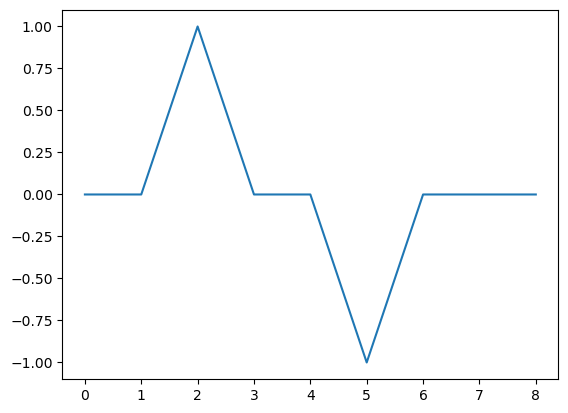

In [47]:
plt.plot(filtered)

In [53]:
sig2 = sig.reshape((len(sig),1))
res = v.Dy_t(sig2)

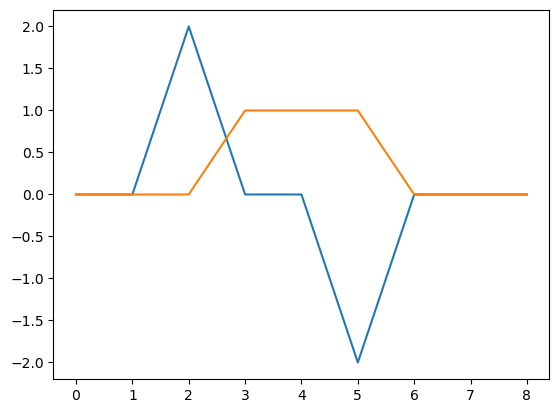

In [54]:
plt.plot(res*dx)
plt.plot(sig)